Auto Encoder Model for Anomaly Detection


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 43, 8)         1160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 43, 43, 8)         0

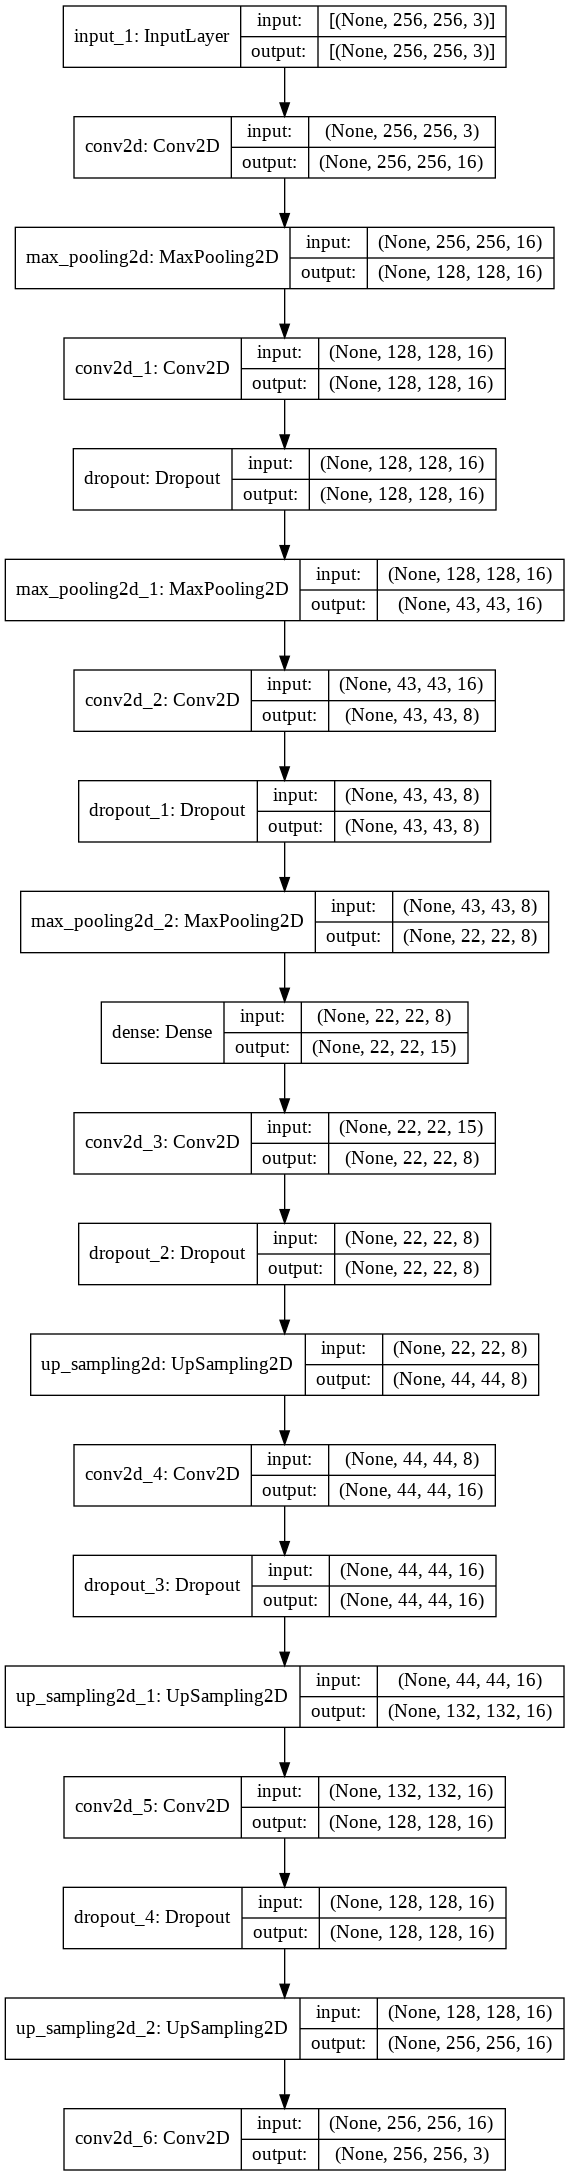

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Input,UpSampling2D,Dropout
dataset = np.load("train-test-plant.npz")
x_train, x_test = dataset["arr_0"], dataset["arr_1"]
x_train= x_train/255
x_test = x_test/255
model = Sequential()
#Encoder
#Input Layer
model.add(Input((256,256,3)))
#layer1
model.add(Conv2D(16,(5,5),activation="LeakyReLU",padding="same"))

model.add(MaxPooling2D((2,2), padding="same"))
#layer2
model.add(Conv2D(16, (3,3), activation="LeakyReLU", padding="same"))
model.add(Dropout(rate=0.2))
model.add(MaxPooling2D((3,3), padding="same"))
#layer3
model.add(Conv2D(8, (3,3), activation="LeakyReLU", padding="same"))
model.add(Dropout(rate=0.2))
model.add(MaxPooling2D((2,2), padding="same"))

model.add(Dense(15, activation= "relu"))

#Decoder
#layer1
model.add(Conv2D(8,(3,3), activation="LeakyReLU", padding="same"))
model.add(Dropout(rate=0.2))
model.add(UpSampling2D((2,2)))
# layer2
model.add(Conv2D(16,(3,3),activation="LeakyReLU", padding="same"))
model.add(Dropout(rate=0.2))
model.add(UpSampling2D((3,3)))
#layer3
model.add(Conv2D(16, (5,5), activation="LeakyReLU"))
model.add(Dropout(rate=0.2))
model.add(UpSampling2D((2,2)))


#Output Layer
model.add(Conv2D(3, (2,2), activation="sigmoid", padding="same"))


print(model.summary())
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
model.fit(x_train,x_train,epochs=20,validation_split=0.15)
model.save("auto-plant_final.h5")
model.evaluate(x_test,x_test)


tf.keras.utils.plot_model(model,to_file="auto-plant_final.png", show_shapes= True, show_layer_names=True)


Calculation of Threshold 


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("auto-plant_final.h5")
img_reconstructed = model.predict(x_train)
loss = np.mean(np.abs(img_reconstructed - x_train), axis=1)
threshold = np.max(loss)
print(threshold)


Model for Classification of Leaves






Found 2297 images belonging to 11 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 124, 124, 16)      4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_9 (C

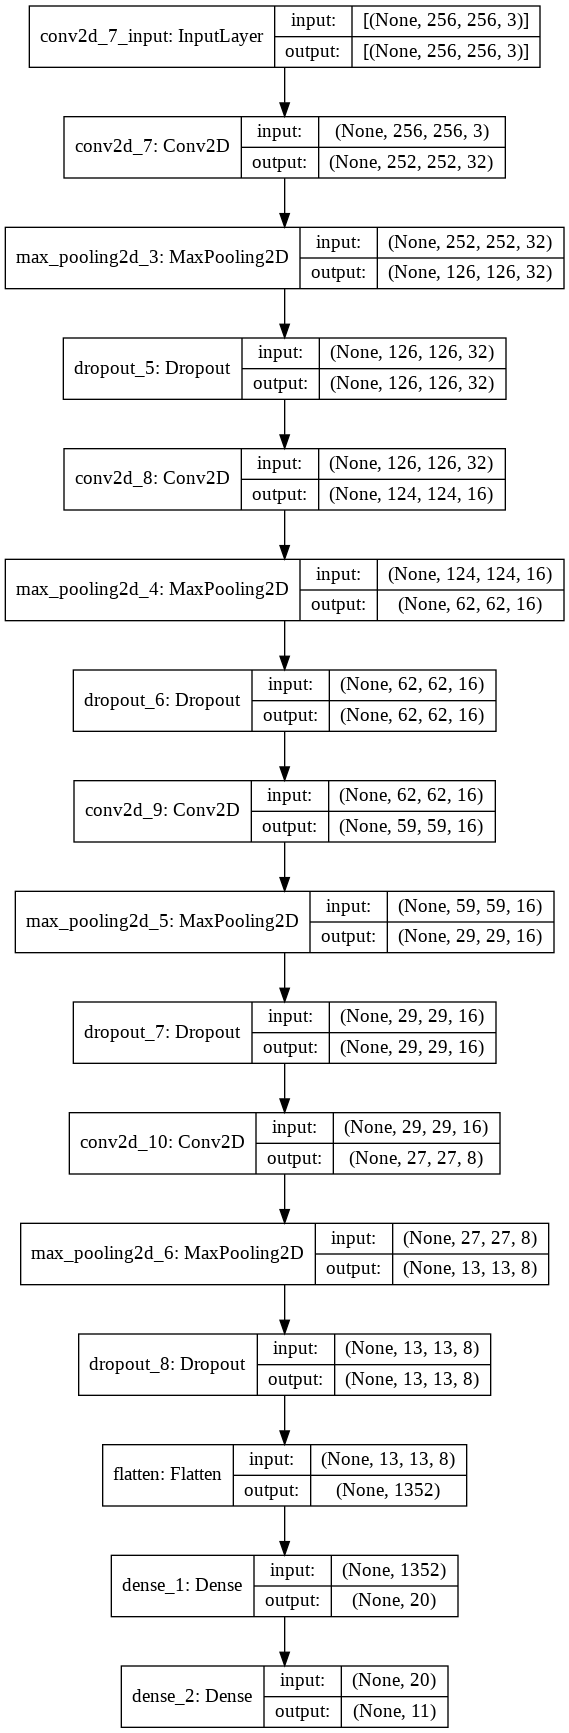

In [ ]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,concatenate,Input,UpSampling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True,rotation_range=90)
train_generator = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/pre-processed",target_size=(256,256),class_mode="categorical")
model2 = Sequential()
model2.add(Conv2D(32, (5,5),activation="relu", input_shape=(256,256,3),padding="valid"))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(16,(3,3),activation="relu",padding="valid"))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(16,(4,4),activation="relu", padding="valid"))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(8,(3,3),activation="relu", padding="valid"))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(20, activation="relu"))
model2.add(Dense(11, activation="softmax"))
print(model2.summary())
model2.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])
model2.fit(train_generator,epochs=20)
model2.save("class-plant3_final.h5")
print(train_generator.class_indices.keys())
tf.keras.utils.plot_model(model2,to_file="class-plant_final.png", show_shapes= True, show_layer_names=True)
